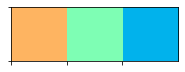

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggMapNet

np.random.seed(666) #just for reaptable results

channel_list =  list(range(1, 50, 4))

color = sns.color_palette("rainbow_r", 3) #PiYG
sns.palplot(color)

In [3]:
from glob import glob

In [4]:
csvs = glob('./C=*.csv')

In [5]:
color = sns.color_palette("rainbow_r", len(csvs)) #PiYG

In [6]:
alls=[]
for csv in csvs:
    dfr = pd.read_csv(csv,index_col=0)
    f = lambda x:[float(i) for i in x.replace("[",'').replace("]",'').split(',')]
    dfr['accuracy'] = dfr['accuracy'].apply(f)
    dfr['val_accuracy'] = dfr['val_accuracy'].apply(f)
    dfr['val_loss'] = dfr['val_loss'].apply(f)
    dfr['loss'] = dfr['loss'].apply(f)
    alls.append(dfr)

In [7]:
dfr = pd.concat(alls)

In [16]:
dfr.to_pickle('dfr.pkl')

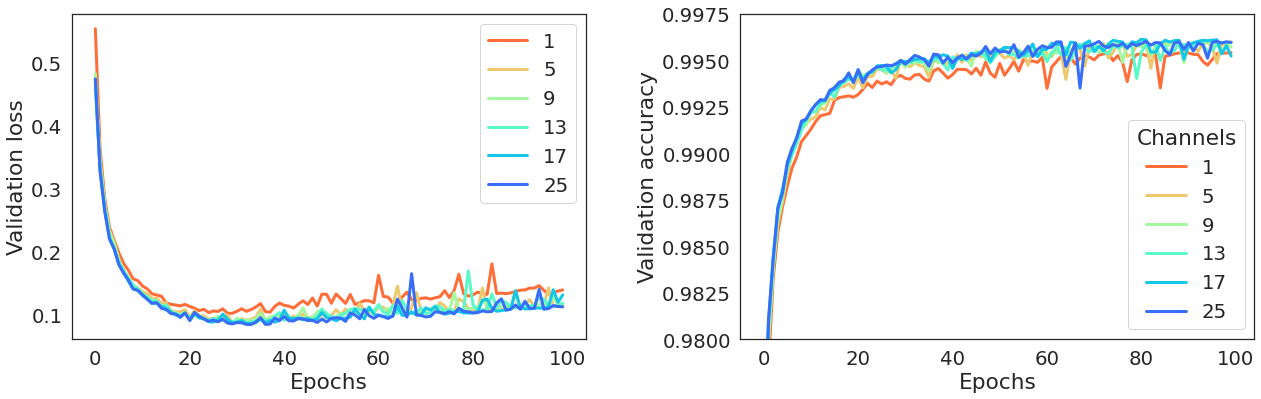

In [8]:
sns.set(style = 'white', font_scale=1.8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax1, ax2 = axes        


col = 'val_loss'
loss_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
loss_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T

loss_mean.columns.name = 'Channels'
loss_std.columns.name = 'Channels'

loss_mean.plot(ax=ax1, lw = 3, color = color)
ax1.set_ylabel('Validation loss')
ax1.set_xlabel('Epochs')
ax1.legend(loc='upper right')
# for i, j in zip(loss_mean.columns, color[:3]):
#     bottom = loss_mean[i]-loss_std[i]
#     up = loss_mean[i] + loss_std[i]
#     ax1.fill_between(loss_mean.index, bottom, up,alpha=0.2, color = j)

#plt.savefig(os.path.join(results_save_folder, 'performance_01_test.png'), bbox_inches='tight', dpi=300)

col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T


acc_mean.columns.name = 'Channels'
acc_std.columns.name = 'Channels'

acc_mean.plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylim(0.980, 0.9975)


fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig('5FCV_valid_covid19.png', bbox_inches='tight', dpi=400)

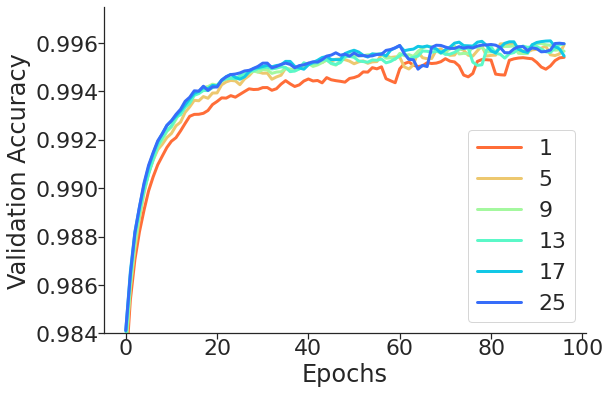

In [20]:
sns.set(style = 'white', font_scale=2)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6), sharex=False, sharey=False, )
ax2 = axes        

col = 'val_accuracy'
acc_mean = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).mean(axis=0)).apply(pd.Series).T
acc_std = dfr.groupby(['c']).agg({col: lambda x:x.tolist()})[col].apply(lambda x: np.array(x).std(axis=0)).apply(pd.Series).T


acc_mean.columns.name = 'Channels'
acc_std.columns.name = 'Channels'

acc_mean.rolling(3).mean().shift(-3).plot(ax=ax2, lw = 3, color = color)
ax2.set_ylabel('Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylim(0.984, 0.9975)
#plt.title('COVMS')

ax2.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)

ax2.legend(loc='lower right')

plt.savefig('5FCV_valid_acc.pdf', bbox_inches='tight', dpi=400)
